In [24]:
# Load Data
import pandas as pd

df = pd.read_csv("./data_train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [25]:
# Print Info About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203282 entries, 0 to 203281
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     203282 non-null  int64  
 1   Product_ID                  203282 non-null  object 
 2   Gender                      203282 non-null  object 
 3   Age                         203282 non-null  object 
 4   Occupation                  203282 non-null  int64  
 5   City_Category               203282 non-null  object 
 6   Stay_In_Current_City_Years  203282 non-null  object 
 7   Marital_Status              203281 non-null  float64
 8   Product_Category_1          203281 non-null  float64
 9   Product_Category_2          140237 non-null  float64
 10  Product_Category_3          62257 non-null   float64
 11  Purchase                    203281 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 18.6+ MB


In [26]:
# Print Describe of Data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.032820e+05,203282.000000,203281.000000,203281.000000,140237.000000,62257.000000,203281.000000
mean,1.002928e+06,8.074527,0.409984,5.292246,9.848143,12.649549,9318.367609
std,1.758386e+03,6.535785,0.491832,3.744244,5.083773,4.123705,4976.290885
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001325e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5857.000000
50%,1.002934e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004418e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12064.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


[]

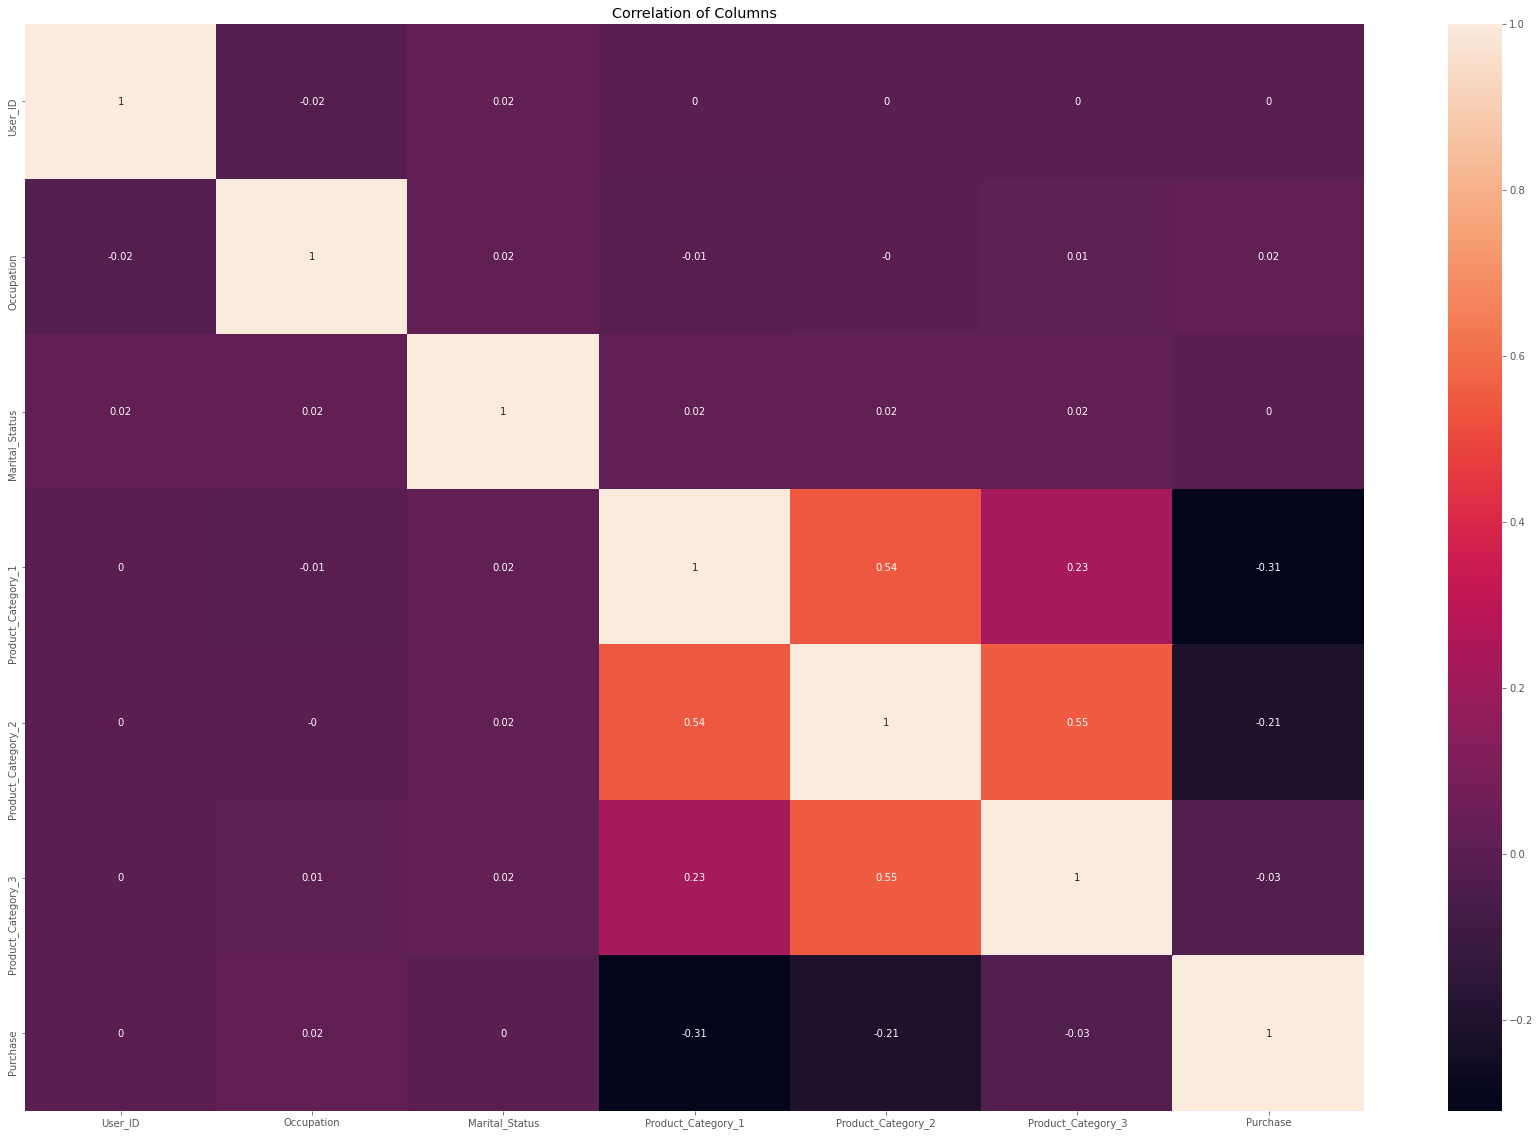

In [27]:
# Check Correlation Data
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(30, 20))
sns.heatmap(data=df.corr().round(2), annot=True)
plt.title('Correlation of Columns')
plt.plot()

In [28]:
# Drop Some Columns
df.drop(columns=["User_ID", "Product_ID"], inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [29]:
# Rename All Column Into Lower
df.columns = [column.lower() for column in df.columns]
print(df.columns)

Index(['gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')


In [30]:
# Print Unique Data
import numpy as np

for column in df.columns:
    print(f"Unique Data for Column {column}: ", np.sort(df[column].unique()))

Unique Data for Column gender:  ['F' 'M']
Unique Data for Column age:  ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Unique Data for Column occupation:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Unique Data for Column city_category:  ['A' 'B' 'C']
Unique Data for Column stay_in_current_city_years:  ['0' '1' '2' '3' '4+']
Unique Data for Column marital_status:  [ 0.  1. nan]
Unique Data for Column product_category_1:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 nan]
Unique Data for Column product_category_2:  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Unique Data for Column product_category_3:  [ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Unique Data for Column purchase:  [  185.   186.   187. ... 23958. 23961.    nan]


In [31]:
# Check Data Null
df.isna().sum()

gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     1
product_category_1                 1
product_category_2             63045
product_category_3            141025
purchase                           1
dtype: int64

In [32]:
# Fill Null Data
df["marital_status"].fillna(df["marital_status"].mean(), inplace=True)
df["product_category_1"].fillna(df["product_category_1"].mean(), inplace=True)
df["product_category_2"].fillna(df["product_category_2"].mean(), inplace=True)
df["product_category_3"].fillna(df["product_category_3"].mean(), inplace=True)
df["purchase"].fillna(df["purchase"].mean(), inplace=True)
df.isna().sum()

gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [33]:
# Change Categorical Data Into Numerical Data
from sklearn.preprocessing import OrdinalEncoder

gender_encoder = OrdinalEncoder()
df[["gender"]] = gender_encoder.fit_transform(df[["gender"]])
age_encoder = OrdinalEncoder()
df[["age"]] = age_encoder.fit_transform(df[["age"]])
city_category_encoder = OrdinalEncoder()
df[["city_category"]] = city_category_encoder.fit_transform(df[["city_category"]])
stay_in_current_city_years_encoder = OrdinalEncoder()
df[["stay_in_current_city_years"]] = stay_in_current_city_years_encoder.fit_transform(df[["stay_in_current_city_years"]])
df.head()

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0.0,0.0,10,0.0,2.0,0.0,3.0,9.848143,12.649549,8370.0
1,0.0,0.0,10,0.0,2.0,0.0,1.0,6.000000,14.000000,15200.0
2,0.0,0.0,10,0.0,2.0,0.0,12.0,9.848143,12.649549,1422.0
3,0.0,0.0,10,0.0,2.0,0.0,12.0,14.000000,12.649549,1057.0
4,1.0,6.0,16,2.0,4.0,0.0,8.0,9.848143,12.649549,7969.0


In [34]:
# Change Data Types of Data
df["product_category_2"] = df["product_category_2"].astype("int64")
df["product_category_3"] = df["product_category_3"].astype("int64")
df["gender"] = df["gender"].astype("int64")
df["age"] = df["age"].astype("int64")
df["city_category"] = df["city_category"].astype("int64")
df["stay_in_current_city_years"] = df["stay_in_current_city_years"].astype("int64")
df.dtypes

gender                          int64
age                             int64
occupation                      int64
city_category                   int64
stay_in_current_city_years      int64
marital_status                float64
product_category_1            float64
product_category_2              int64
product_category_3              int64
purchase                      float64
dtype: object

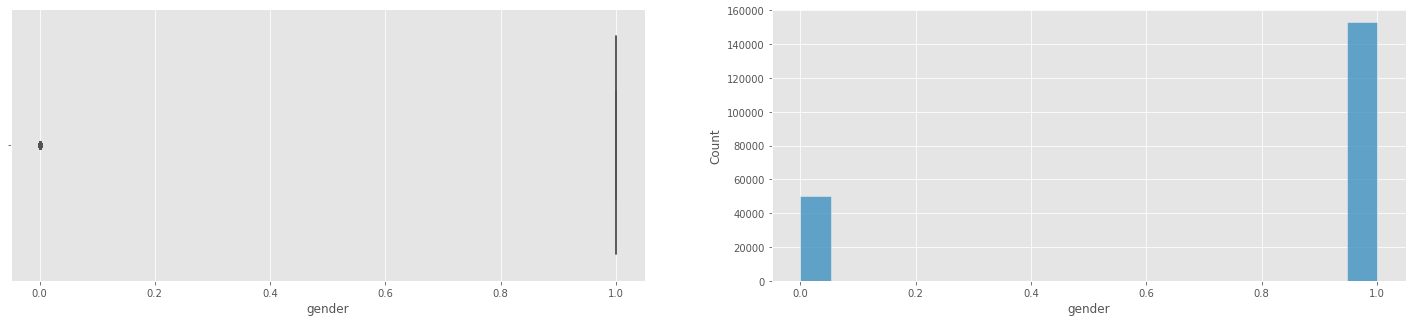

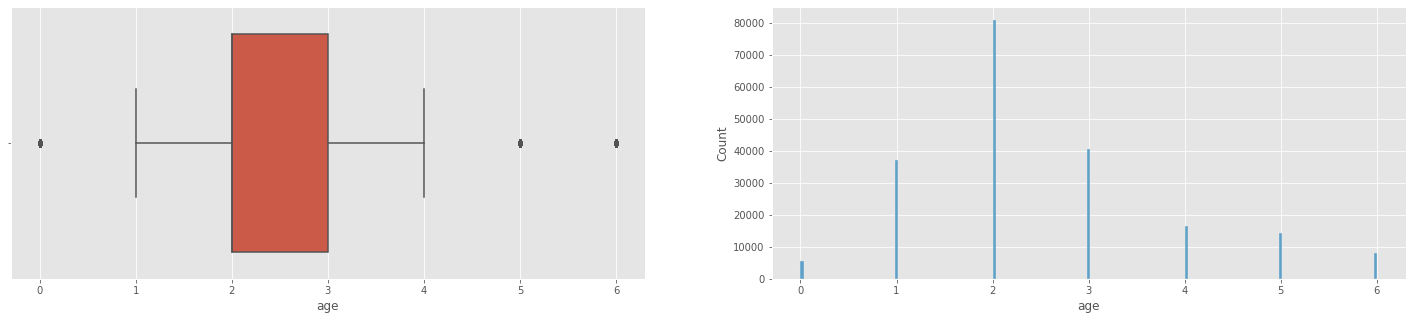

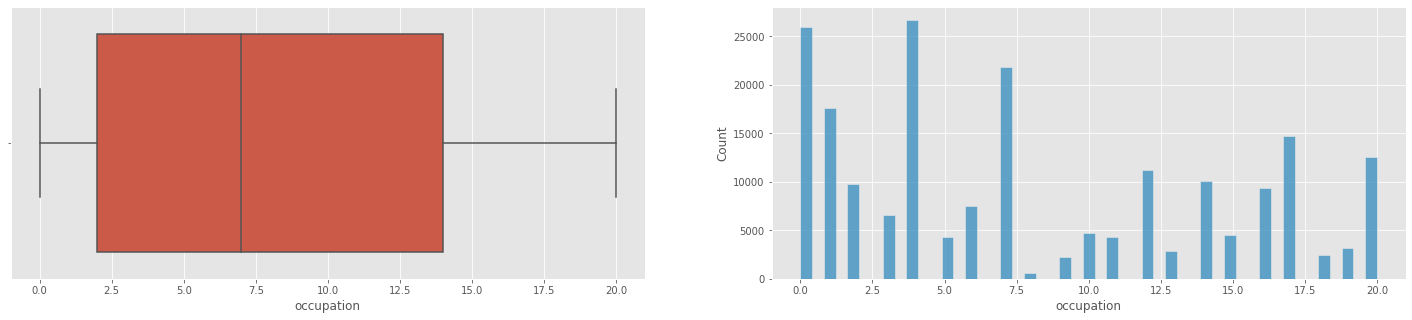

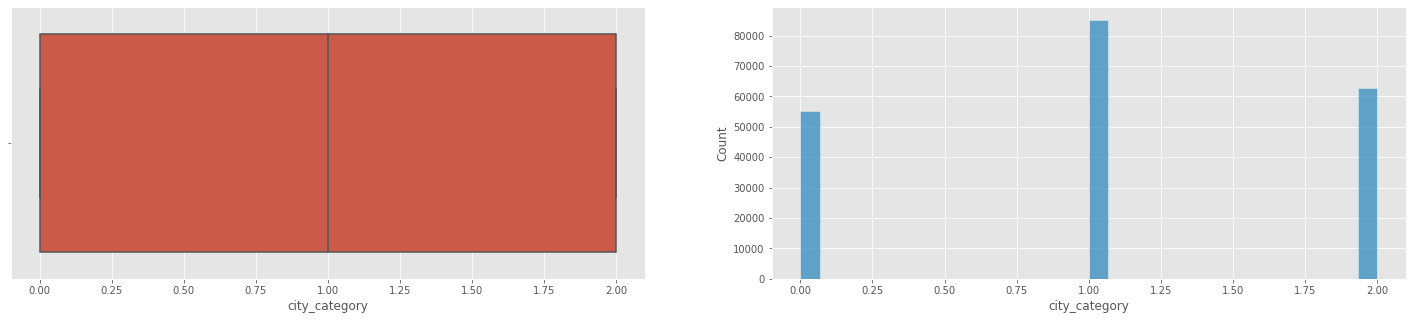

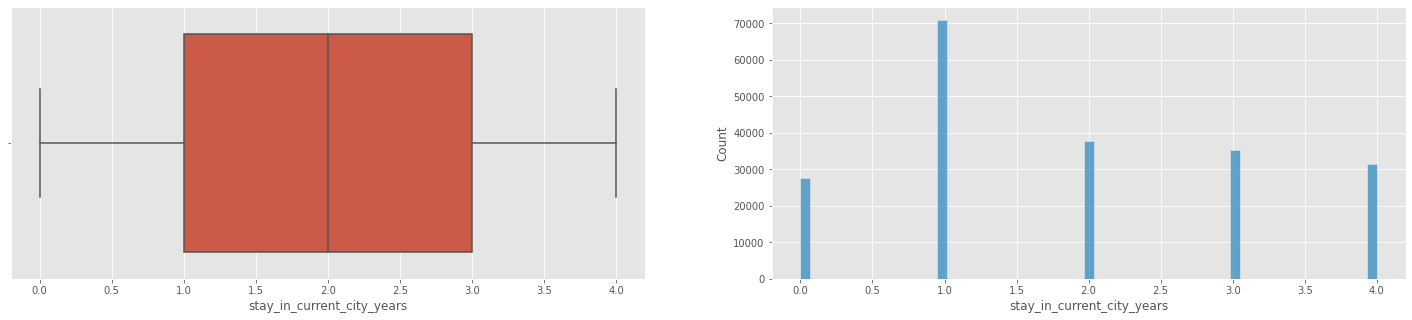

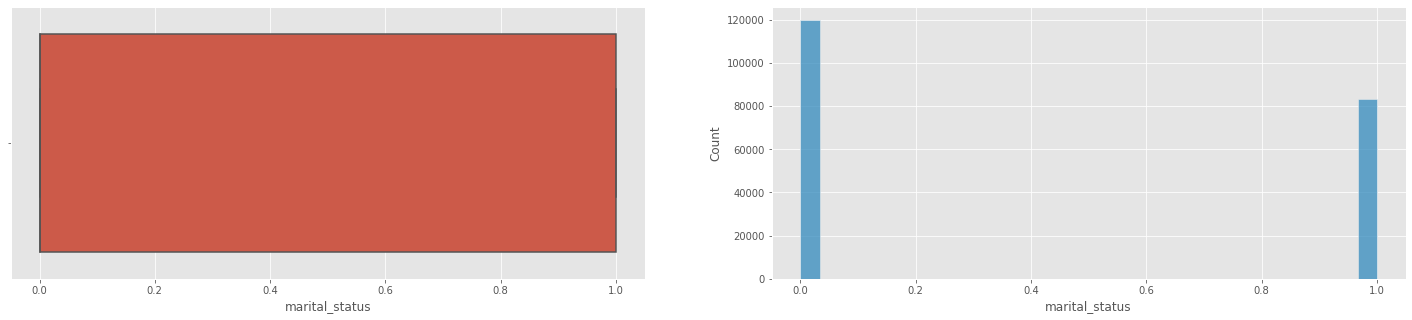

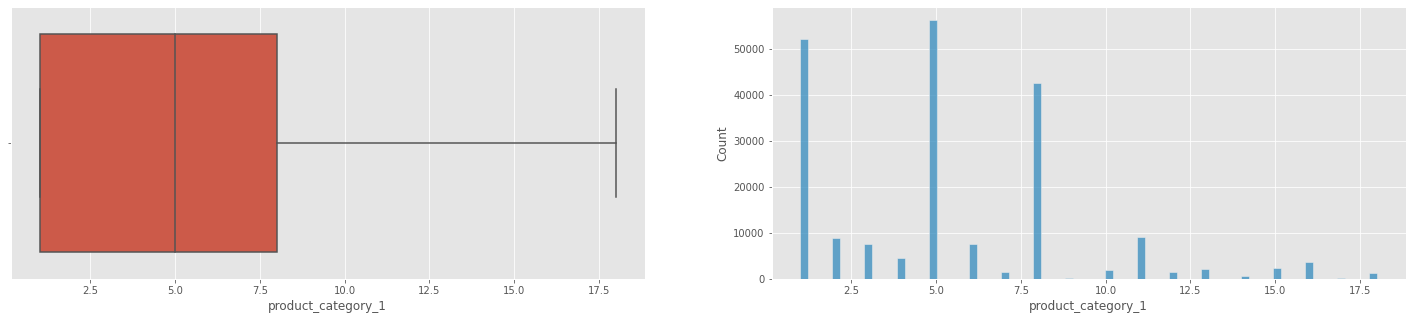

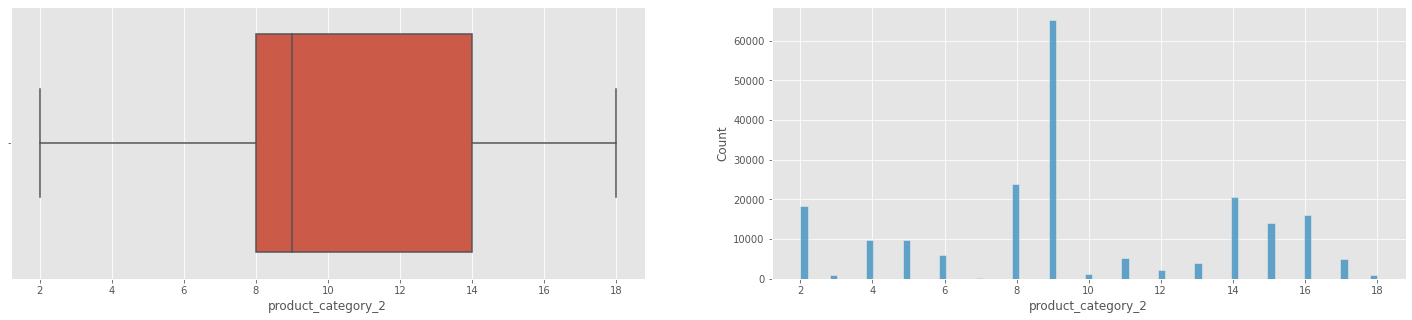

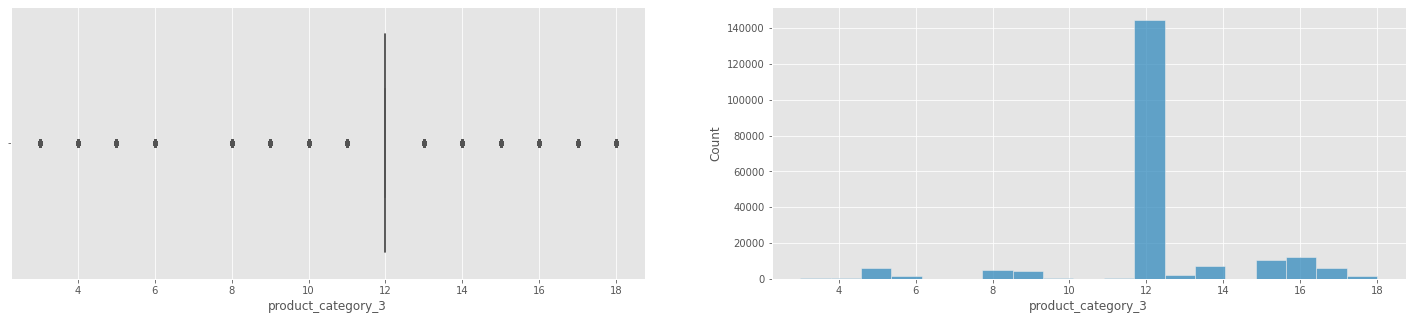

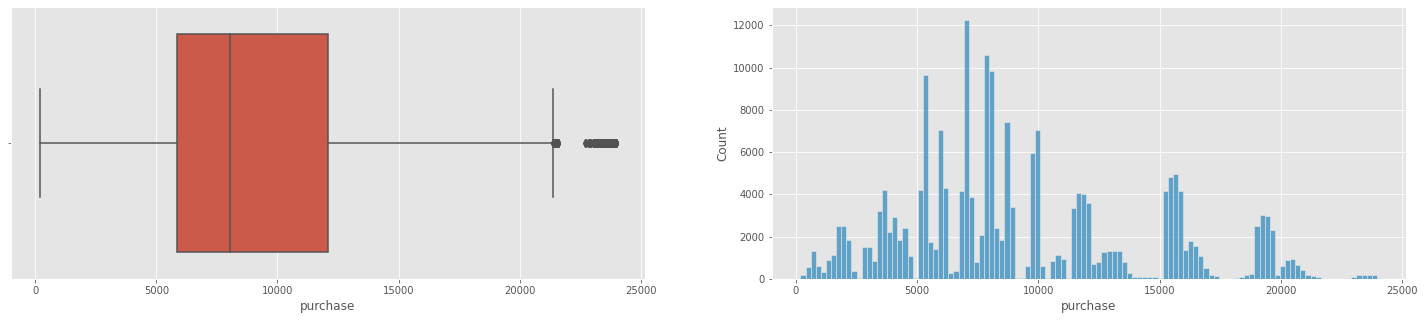

In [35]:
# Checking for outliers and plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(25, 5))
    sns.boxplot(x=df[column], ax=axs[0])
    sns.histplot(x=df[column], ax=axs[1])
    plt.show()

In [36]:
# Remove Outliers Data
print('Data Before Remove Outliers:', df.shape[0])
Q1_outliers = df[['gender', 'age', 'product_category_3', 'purchase']].quantile(0.25)
Q3_outliers = df[['gender', 'age', 'product_category_3', 'purchase']].quantile(0.75)
IQR_outliers = Q3_outliers - Q1_outliers

maximum_outliers = Q3_outliers + (1.5 * IQR_outliers)
minimum_outliers = Q1_outliers - (1.5 * IQR_outliers)
more_than_outliers = (df > maximum_outliers)
lower_than_outliers = (df < minimum_outliers)
df = df.mask(more_than_outliers, maximum_outliers, axis=1)
df = df.mask(lower_than_outliers, minimum_outliers, axis=1)
print('Data After Remove Outliers:', df.shape[0])

Data Before Remove Outliers: 203282
Data After Remove Outliers: 203282


In [37]:
# Remove Duplicates Data
print("Data Before Drop Duplicates: ", df.shape[0])
df = df.drop_duplicates()
print("Data After Drop Duplicates: ", df.shape[0])

Data Before Drop Duplicates:  203282
Data After Drop Duplicates:  201880


In [38]:
# Change Data Types
df["age"] = df["age"].astype("int64")
df["marital_status"] = df["marital_status"].astype("int64")
df["product_category_1"] = df["product_category_1"].astype("int64")
df["purchase"] = df["purchase"].astype("int64")
df.dtypes

gender                          int64
age                             int64
occupation                      int64
city_category                   int64
stay_in_current_city_years      int64
marital_status                float64
product_category_1              int64
product_category_2              int64
product_category_3              int64
purchase                        int64
dtype: object

In [39]:
# Get Features and Labels
features_data = df.drop(columns=["purchase"])
labels_data = df[["purchase"]]
print("Features Data: ", features_data)
print("Labels Data: ", labels_data)

Features Data:          gender  age  ...  product_category_2  product_category_3
0            1    0  ...                   9                  12
1            1    0  ...                   6                  12
2            1    0  ...                   9                  12
3            1    0  ...                  14                  12
4            1    4  ...                   9                  12
...        ...  ...  ...                 ...                 ...
203277       1    0  ...                   9                  12
203278       1    0  ...                  11                  12
203279       1    0  ...                   8                  12
203280       1    0  ...                  14                  12
203281       1    0  ...                   9                  12

[201880 rows x 9 columns]
Labels Data:          purchase
0           8370
1          15200
2           1422
3           1057
4           7969
...          ...
203277      5210
203278      5385
203279    

In [40]:
# Normalization Data
from sklearn.preprocessing import MinMaxScaler

features_scaler = MinMaxScaler().fit(features_data)
features_data = features_scaler.transform(features_data)
labels_scaler = MinMaxScaler().fit(labels_data)
labels_data = labels_scaler.transform(labels_data)
print("Features Data: ", features_data)
print("Labels Data: ", labels_data)

Features Data:  [[0.         0.         0.5        ... 0.11764706 0.4375     0.        ]
 [0.         0.         0.5        ... 0.         0.25       0.        ]
 [0.         0.         0.5        ... 0.64705882 0.4375     0.        ]
 ...
 [0.         0.         0.5        ... 0.         0.375      0.        ]
 [0.         0.         0.5        ... 0.23529412 0.75       0.        ]
 [0.         0.         0.5        ... 0.23529412 0.4375     0.        ]]
Labels Data:  [[0.38628534]
 [0.7086224 ]
 [0.05837935]
 ...
 [0.72622587]
 [0.23960546]
 [0.43102553]]


In [41]:
# Split Data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features_data, labels_data, test_size=0.2, random_state=69)
print('Total Features Train:', x_train.shape[0])
print('Total Labels Test:', x_val.shape[0])
print('Total Features Train:', y_train.shape[0])
print('Total Labels Test:', y_val.shape[0])

Total Features Train: 161504
Total Labels Test: 40376
Total Features Train: 161504
Total Labels Test: 40376


In [42]:
# Make Model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

In [43]:
# Make Callbacks
callback0 = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=8,
    restore_best_weights=True
)

In [44]:
# Train Model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[callback0]
)

Epoch 1/100
5047/5047 [==============================] - 20s 4ms/step - loss: 0.1146 - mae: 0.2319 - val_loss: 0.0423 - val_mae: 0.1491
Epoch 2/100
5047/5047 [==============================] - 18s 4ms/step - loss: 0.0524 - mae: 0.1754 - val_loss: 0.0402 - val_mae: 0.1448
Epoch 3/100
5047/5047 [==============================] - 19s 4ms/step - loss: 0.0437 - mae: 0.1573 - val_loss: 0.0408 - val_mae: 0.1493
Epoch 4/100
5047/5047 [==============================] - 20s 4ms/step - loss: 0.0396 - mae: 0.1480 - val_loss: 0.0366 - val_mae: 0.1421
Epoch 5/100
5047/5047 [==============================] - 18s 4ms/step - loss: 0.0379 - mae: 0.1447 - val_loss: 0.0349 - val_mae: 0.1374
Epoch 6/100
5047/5047 [==============================] - 18s 4ms/step - loss: 0.0365 - mae: 0.1421 - val_loss: 0.0334 - val_mae: 0.1361
Epoch 7/100
5047/5047 [==============================] - 19s 4ms/step - loss: 0.0356 - mae: 0.1409 - val_loss: 0.0316 - val_mae: 0.1290
Epoch 8/100
5047/5047 [=========================

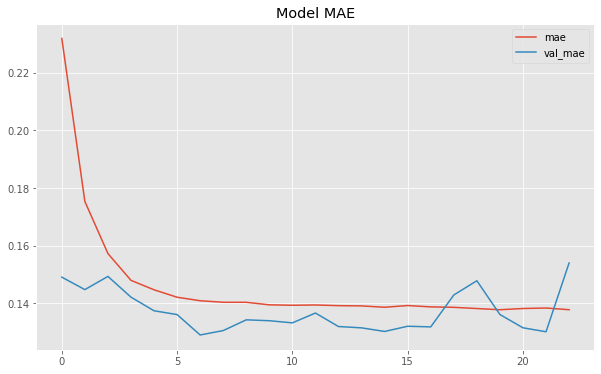

In [45]:
# Plot MAE Model
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.legend(['mae', 'val_mae'])
plt.show()

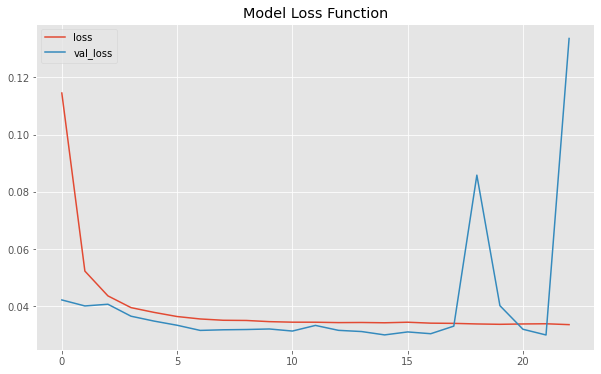

In [46]:
# Plot Loss Model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Function')
plt.legend(['loss', 'val_loss'])
plt.show()

In [47]:
# Load Data Test
data_test = pd.read_csv("./data_test.csv")
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [48]:
# Drop Column User_ID and Product_ID
data_test.drop(columns=["User_ID", "Product_ID"], inplace=True)
data_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [49]:
# Rename All Columns Into Lower Text
data_test.columns = [column.lower() for column in data_test.columns]
print(data_test.columns)

Index(['gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3'],
      dtype='object')


In [50]:
# Check Null Data
data_test.isna().sum()

gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2             72344
product_category_3            162562
dtype: int64

In [51]:
# Fill Null Column
data_test["product_category_2"].fillna(data_test["product_category_2"].mean(), inplace=True)
data_test["product_category_3"].fillna(data_test["product_category_3"].mean(), inplace=True)
data_test.isna().sum()

gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
dtype: int64

In [53]:
# Change Test Data Categorical Into Numerical
data_test[["gender"]] = gender_encoder.transform(data_test[["gender"]])
data_test[["age"]] = age_encoder.transform(data_test[["age"]])
data_test[["city_category"]] = city_category_encoder.transform(data_test[["city_category"]])
data_test[["stay_in_current_city_years"]] = stay_in_current_city_years_encoder.transform(data_test[["stay_in_current_city_years"]])
data_test.head()

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
0,1.0,4.0,7,1.0,2.0,1,1,11.0,12.669454
1,1.0,2.0,17,2.0,0.0,0,3,5.0,12.669454
2,0.0,3.0,1,1.0,4.0,1,5,14.0,12.669454
3,0.0,3.0,1,1.0,4.0,1,4,9.0,12.669454
4,0.0,2.0,1,2.0,1.0,0,4,5.0,12.000000


In [59]:
# Change Data Types
data_test[["gender"]] = data_test[["gender"]].astype("int64")
data_test[["age"]] = data_test[["age"]].astype("int64")
data_test[["city_category"]] = data_test[["city_category"]].astype("int64")
data_test[["stay_in_current_city_years"]] = data_test[["stay_in_current_city_years"]].astype("int64")
data_test[["product_category_2"]] = data_test[["product_category_2"]].astype("int64")
data_test[["product_category_3"]] = data_test[["product_category_3"]].astype("int64")
data_test.dtypes

gender                        int64
age                           int64
occupation                    int64
city_category                 int64
stay_in_current_city_years    int64
marital_status                int64
product_category_1            int64
product_category_2            int64
product_category_3            int64
dtype: object

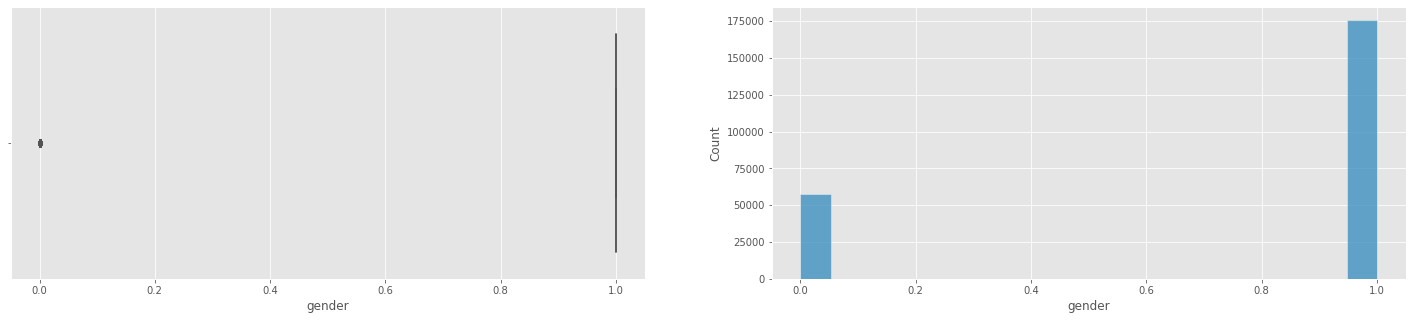

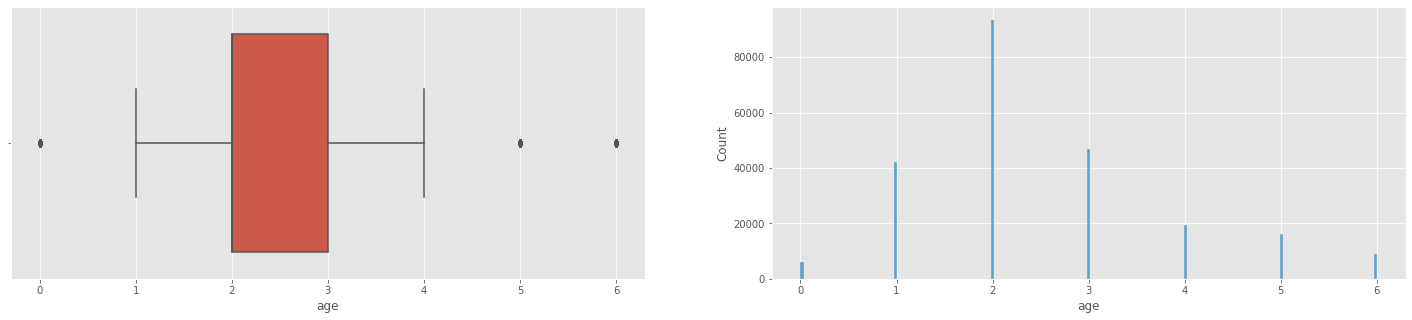

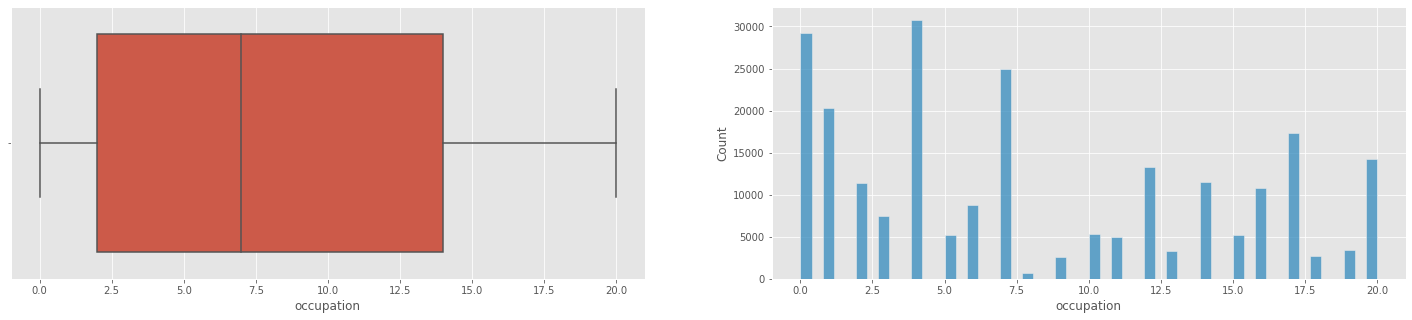

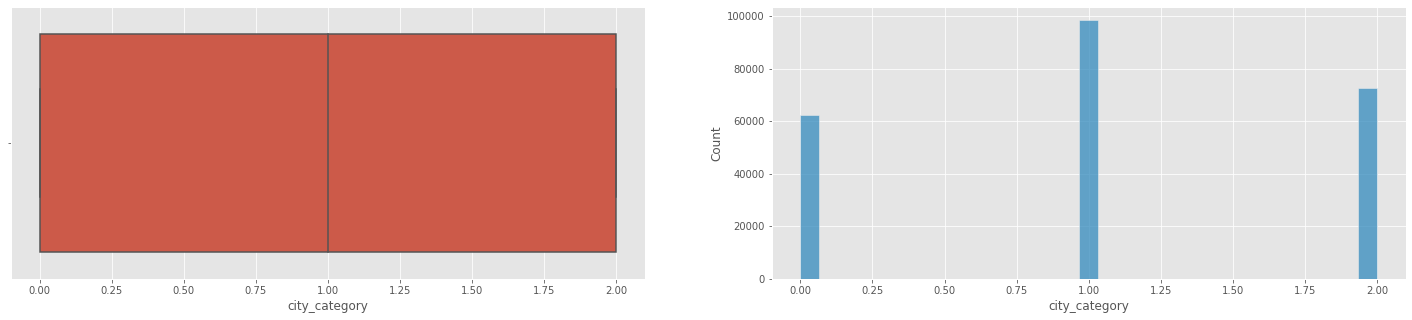

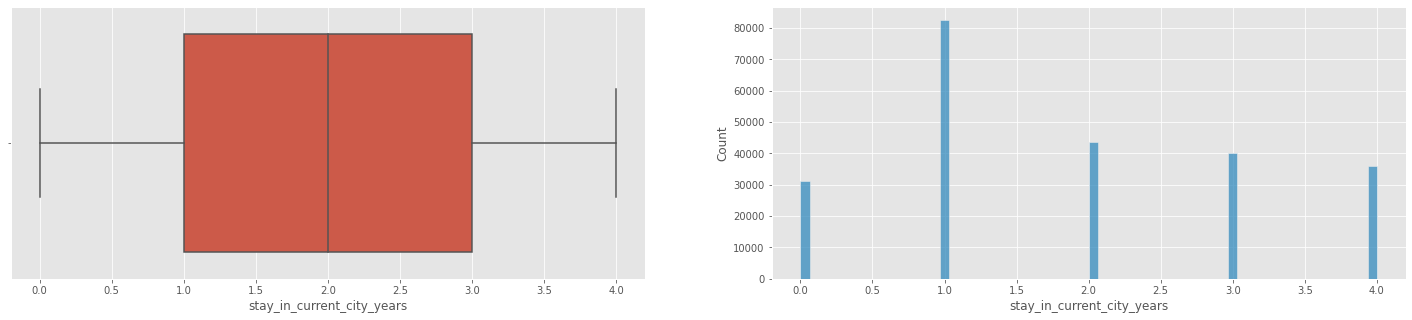

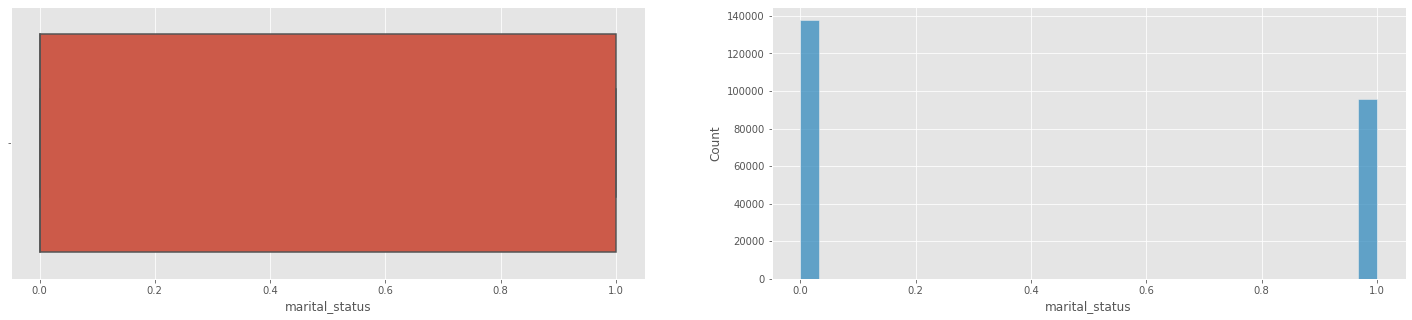

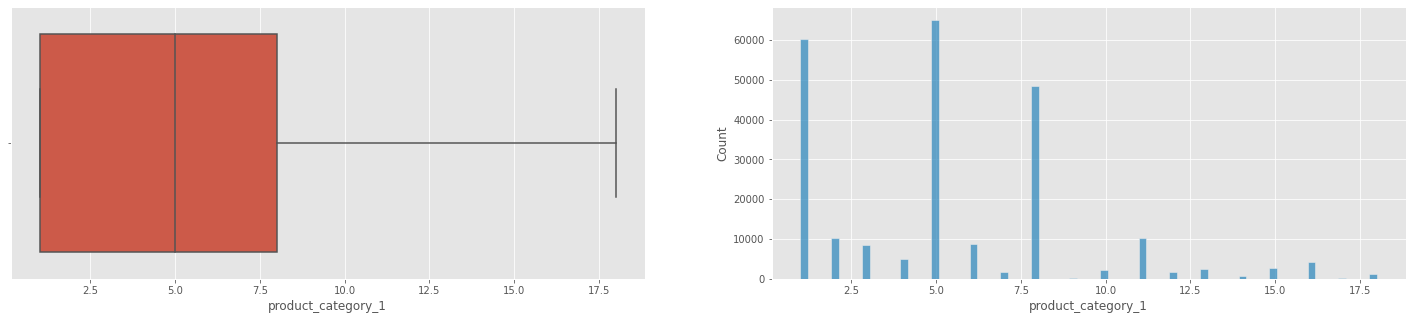

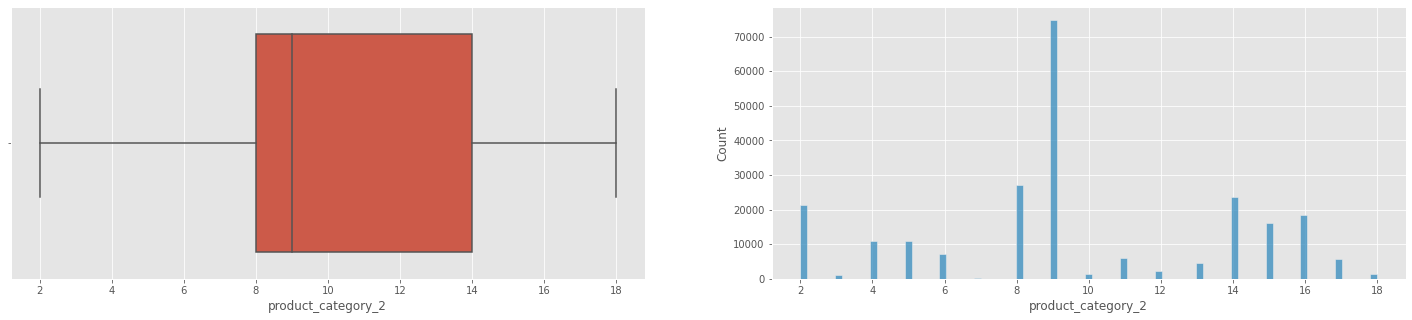

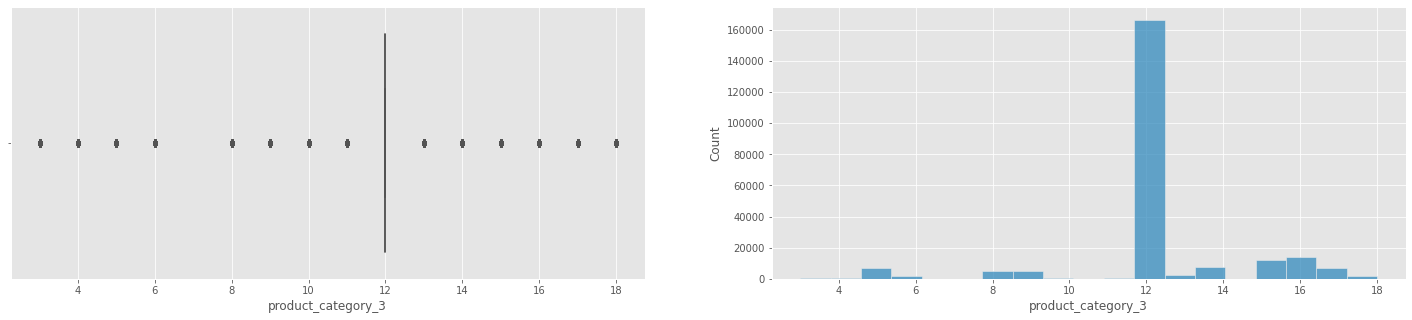

In [60]:
# Checking for outliers and plot distribution
for column in data_test.columns:
    fig, axs = plt.subplots(1, 2, figsize=(25, 5))
    sns.boxplot(x=data_test[column], ax=axs[0])
    sns.histplot(x=data_test[column], ax=axs[1])
    plt.show()

In [61]:
# Remove Outliers Data
print('Data Before Remove Outliers:', data_test.shape[0])
Q1_outliers_test = data_test[['gender', 'age', 'product_category_3']].quantile(0.25)
Q3_outliers_test = data_test[['gender', 'age', 'product_category_3']].quantile(0.75)
IQR_outliers_test = Q3_outliers_test - Q1_outliers_test

maximum_outliers_test = Q3_outliers_test + (1.5 * IQR_outliers_test)
minimum_outliers_test = Q1_outliers_test - (1.5 * IQR_outliers_test)
more_than_outliers_test = (data_test > maximum_outliers_test)
lower_than_outliers_test = (data_test < minimum_outliers_test)
data_test = data_test.mask(more_than_outliers_test, maximum_outliers_test, axis=1)
data_test = data_test.mask(lower_than_outliers_test, minimum_outliers_test, axis=1)
print('Data After Remove Outliers:', data_test.shape[0])

Data Before Remove Outliers: 233599
Data After Remove Outliers: 233599


In [ ]:
# Normalization Data
data_test = features_scaler.transform(data_test)
data_test

In [64]:
# Predict Data
predict_test = model.predict(data_test)
predict_test

array([[0.6094173 ],
       [0.4473697 ],
       [0.2778467 ],
       ...,
       [0.59268194],
       [0.40117985],
       [0.2597994 ]], dtype=float32)

In [65]:
# Change Scale Predict Test
predict_test = labels_scaler.inverse_transform(predict_test)
predict_test

array([[13097.943 ],
       [ 9664.316 ],
       [ 6072.2935],
       ...,
       [12743.338 ],
       [ 8685.6   ],
       [ 5689.889 ]], dtype=float32)

In [66]:
# Import Data New Test
data_test = pd.read_csv("./data_test.csv")
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [71]:
# Drop Columns
data_test = data_test.iloc[:, 0:2]
data_test

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842
...,...,...
233594,1006036,P00118942
233595,1006036,P00254642
233596,1006036,P00031842
233597,1006037,P00124742


In [72]:
# Take Predict Data into Data Test
data_test[["Purchase"]] = predict_test
data_test

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13097.943359
1,1000009,P00113442,9664.316406
2,1000010,P00288442,6072.293457
3,1000010,P00145342,5749.793457
4,1000011,P00053842,5681.351074
...,...,...,...
233594,1006036,P00118942,8662.767578
233595,1006036,P00254642,6190.076172
233596,1006036,P00031842,12743.337891
233597,1006037,P00124742,8685.599609


In [74]:
# Make All Predict Test Into Integer
data_test[["Purchase"]] = data_test[["Purchase"]].apply(lambda x: int(x), axis=1)
data_test.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13097
1,1000009,P00113442,9664
2,1000010,P00288442,6072
3,1000010,P00145342,5749
4,1000011,P00053842,5681


In [75]:
# Change Order Column
data_test = data_test[["Purchase", "User_ID", "Product_ID"]]
data_test.head()

,Purchase,User_ID,Product_ID
0,13097,1000004,P00128942
1,9664,1000009,P00113442
2,6072,1000010,P00288442
3,5749,1000010,P00145342
4,5681,1000011,P00053842


In [76]:
# Save Into CSV
data_test.to_csv("predict_test.csv", index=False)